In [4]:
library(data.table)

In [5]:
dt = fread("MatVolat CSV.csv")

In [6]:
# getting the first row to set it as names 
names = c("strike")
for(obj in dt[1]){
    if(!is.na(obj)){
        names = c(names,obj)
    } 
}
# deleting the first row in the data frame
dt = dt[-c(1),]

In [7]:
#transforming the data, to transform the ',' to '.', and convert it to numeric value
dt[,V2:=as.numeric(gsub(",",".",V2))]
dt[,V3:=as.numeric(gsub(",",".",V3))]
dt[,V4:=as.numeric(gsub(",",".",V4))]
dt[,V5:=as.numeric(gsub(",",".",V5))]
dt[,V6:=as.numeric(gsub(",",".",V6))]
dt[,V7:=as.numeric(gsub(",",".",V7))]
dt[,V8:=as.numeric(gsub(",",".",V8))]
dt[,V9:=as.numeric(gsub(",",".",V9))]
dt[,V10:=as.numeric(gsub(",",".",V10))]
dt[,V11:=as.numeric(gsub(",",".",V11))]
dt[,V12:=as.numeric(gsub(",",".",V12))]
dt[,V13:=as.numeric(gsub(",",".",V13))]
dt[,V14:=as.numeric(gsub(",",".",V14))]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,"0,571172379","0,45998967","0,481028969","0,483138122","0,448527773","0,465777616","0,449026588","0,44692327","0,44186548","0,48960125","0,475462376","0,475989352"
2,1000,0.642369609,"0,52829268","0,524900584","0,466953456","0,458103396","0,452684205","0,437636535","0,414393379","0,398335717","0,420507545","0,424799282","0,40548307","0,426731893"
3,1100,0.57441278,"0,423668116","0,495875318","0,450731345","0,427112913","0,453906594","0,413285873","0,401919889","0,384599541","0,381767622","0,421874747","0,408233789","0,395861041"
4,1300,0.531488852,"0,501864284","0,456840967","0,447140612","0,410916382","0,411265953","0,405645268","0,390294856","0,394285392","0,379552365","0,40480092","0,417518057","0,407212924"
5,1400,0.526611008,"0,491858088","0,440661726","0,420534216","0,406766076","0,404819105","0,403350641","0,40315427","0,375783127","0,376733658","0,372969394","0,399950841","0,392566329"
6,1500,0.5004076,"0,455824306","0,424620204","0,405157879","0,411216287","0,379871213","0,402020926","0,381289055","0,375237617","0,358467335","0,368264175","0,387886241","0,397983632"
7,2000,0.413458025,"0,36146347","0,366701231","0,3543503","0,368050444","0,352450566","0,341202014","0,322597702","0,350818371","0,323229808","0,366120824","0,349947267","0,361732062"
8,2200,0.378034219,"0,360918802","0,34728063","0,338907629","0,342880163","0,348987307","0,335885555","0,318308517","0,339208088","0,309310304","0,337244941","0,356855938","0,32917939"
9,2400,0.326171845,"0,313593975","0,329755364","0,320538472","0,309479426","0,332567908","0,329702102","0,327082692","0,322131227","0,306113233","0,346301143","0,334775226","0,33098848"
10,2500,0.298637865,"0,324521103","0,30308788","0,321149263","0,320796646","0,301989972","0,300636291","0,306268302","0,312850096","0,306269725","0,332853532","0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,"0,45998967","0,481028969","0,483138122","0,448527773","0,465777616","0,449026588","0,44692327","0,44186548","0,48960125","0,475462376","0,475989352"
2,1000,0.642369609,0.52829268,"0,524900584","0,466953456","0,458103396","0,452684205","0,437636535","0,414393379","0,398335717","0,420507545","0,424799282","0,40548307","0,426731893"
3,1100,0.57441278,0.423668116,"0,495875318","0,450731345","0,427112913","0,453906594","0,413285873","0,401919889","0,384599541","0,381767622","0,421874747","0,408233789","0,395861041"
4,1300,0.531488852,0.501864284,"0,456840967","0,447140612","0,410916382","0,411265953","0,405645268","0,390294856","0,394285392","0,379552365","0,40480092","0,417518057","0,407212924"
5,1400,0.526611008,0.491858088,"0,440661726","0,420534216","0,406766076","0,404819105","0,403350641","0,40315427","0,375783127","0,376733658","0,372969394","0,399950841","0,392566329"
6,1500,0.5004076,0.455824306,"0,424620204","0,405157879","0,411216287","0,379871213","0,402020926","0,381289055","0,375237617","0,358467335","0,368264175","0,387886241","0,397983632"
7,2000,0.413458025,0.36146347,"0,366701231","0,3543503","0,368050444","0,352450566","0,341202014","0,322597702","0,350818371","0,323229808","0,366120824","0,349947267","0,361732062"
8,2200,0.378034219,0.360918802,"0,34728063","0,338907629","0,342880163","0,348987307","0,335885555","0,318308517","0,339208088","0,309310304","0,337244941","0,356855938","0,32917939"
9,2400,0.326171845,0.313593975,"0,329755364","0,320538472","0,309479426","0,332567908","0,329702102","0,327082692","0,322131227","0,306113233","0,346301143","0,334775226","0,33098848"
10,2500,0.298637865,0.324521103,"0,30308788","0,321149263","0,320796646","0,301989972","0,300636291","0,306268302","0,312850096","0,306269725","0,332853532","0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,0.45998967,"0,481028969","0,483138122","0,448527773","0,465777616","0,449026588","0,44692327","0,44186548","0,48960125","0,475462376","0,475989352"
2,1000,0.642369609,0.52829268,0.524900584,"0,466953456","0,458103396","0,452684205","0,437636535","0,414393379","0,398335717","0,420507545","0,424799282","0,40548307","0,426731893"
3,1100,0.57441278,0.423668116,0.495875318,"0,450731345","0,427112913","0,453906594","0,413285873","0,401919889","0,384599541","0,381767622","0,421874747","0,408233789","0,395861041"
4,1300,0.531488852,0.501864284,0.456840967,"0,447140612","0,410916382","0,411265953","0,405645268","0,390294856","0,394285392","0,379552365","0,40480092","0,417518057","0,407212924"
5,1400,0.526611008,0.491858088,0.440661726,"0,420534216","0,406766076","0,404819105","0,403350641","0,40315427","0,375783127","0,376733658","0,372969394","0,399950841","0,392566329"
6,1500,0.5004076,0.455824306,0.424620204,"0,405157879","0,411216287","0,379871213","0,402020926","0,381289055","0,375237617","0,358467335","0,368264175","0,387886241","0,397983632"
7,2000,0.413458025,0.36146347,0.366701231,"0,3543503","0,368050444","0,352450566","0,341202014","0,322597702","0,350818371","0,323229808","0,366120824","0,349947267","0,361732062"
8,2200,0.378034219,0.360918802,0.34728063,"0,338907629","0,342880163","0,348987307","0,335885555","0,318308517","0,339208088","0,309310304","0,337244941","0,356855938","0,32917939"
9,2400,0.326171845,0.313593975,0.329755364,"0,320538472","0,309479426","0,332567908","0,329702102","0,327082692","0,322131227","0,306113233","0,346301143","0,334775226","0,33098848"
10,2500,0.298637865,0.324521103,0.30308788,"0,321149263","0,320796646","0,301989972","0,300636291","0,306268302","0,312850096","0,306269725","0,332853532","0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,0.45998967,0.481028969,"0,483138122","0,448527773","0,465777616","0,449026588","0,44692327","0,44186548","0,48960125","0,475462376","0,475989352"
2,1000,0.642369609,0.52829268,0.524900584,0.466953456,"0,458103396","0,452684205","0,437636535","0,414393379","0,398335717","0,420507545","0,424799282","0,40548307","0,426731893"
3,1100,0.57441278,0.423668116,0.495875318,0.450731345,"0,427112913","0,453906594","0,413285873","0,401919889","0,384599541","0,381767622","0,421874747","0,408233789","0,395861041"
4,1300,0.531488852,0.501864284,0.456840967,0.447140612,"0,410916382","0,411265953","0,405645268","0,390294856","0,394285392","0,379552365","0,40480092","0,417518057","0,407212924"
5,1400,0.526611008,0.491858088,0.440661726,0.420534216,"0,406766076","0,404819105","0,403350641","0,40315427","0,375783127","0,376733658","0,372969394","0,399950841","0,392566329"
6,1500,0.5004076,0.455824306,0.424620204,0.405157879,"0,411216287","0,379871213","0,402020926","0,381289055","0,375237617","0,358467335","0,368264175","0,387886241","0,397983632"
7,2000,0.413458025,0.36146347,0.366701231,0.3543503,"0,368050444","0,352450566","0,341202014","0,322597702","0,350818371","0,323229808","0,366120824","0,349947267","0,361732062"
8,2200,0.378034219,0.360918802,0.34728063,0.338907629,"0,342880163","0,348987307","0,335885555","0,318308517","0,339208088","0,309310304","0,337244941","0,356855938","0,32917939"
9,2400,0.326171845,0.313593975,0.329755364,0.320538472,"0,309479426","0,332567908","0,329702102","0,327082692","0,322131227","0,306113233","0,346301143","0,334775226","0,33098848"
10,2500,0.298637865,0.324521103,0.30308788,0.321149263,"0,320796646","0,301989972","0,300636291","0,306268302","0,312850096","0,306269725","0,332853532","0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,0.45998967,0.481028969,0.483138122,"0,448527773","0,465777616","0,449026588","0,44692327","0,44186548","0,48960125","0,475462376","0,475989352"
2,1000,0.642369609,0.52829268,0.524900584,0.466953456,0.458103396,"0,452684205","0,437636535","0,414393379","0,398335717","0,420507545","0,424799282","0,40548307","0,426731893"
3,1100,0.57441278,0.423668116,0.495875318,0.450731345,0.427112913,"0,453906594","0,413285873","0,401919889","0,384599541","0,381767622","0,421874747","0,408233789","0,395861041"
4,1300,0.531488852,0.501864284,0.456840967,0.447140612,0.410916382,"0,411265953","0,405645268","0,390294856","0,394285392","0,379552365","0,40480092","0,417518057","0,407212924"
5,1400,0.526611008,0.491858088,0.440661726,0.420534216,0.406766076,"0,404819105","0,403350641","0,40315427","0,375783127","0,376733658","0,372969394","0,399950841","0,392566329"
6,1500,0.5004076,0.455824306,0.424620204,0.405157879,0.411216287,"0,379871213","0,402020926","0,381289055","0,375237617","0,358467335","0,368264175","0,387886241","0,397983632"
7,2000,0.413458025,0.36146347,0.366701231,0.3543503,0.368050444,"0,352450566","0,341202014","0,322597702","0,350818371","0,323229808","0,366120824","0,349947267","0,361732062"
8,2200,0.378034219,0.360918802,0.34728063,0.338907629,0.342880163,"0,348987307","0,335885555","0,318308517","0,339208088","0,309310304","0,337244941","0,356855938","0,32917939"
9,2400,0.326171845,0.313593975,0.329755364,0.320538472,0.309479426,"0,332567908","0,329702102","0,327082692","0,322131227","0,306113233","0,346301143","0,334775226","0,33098848"
10,2500,0.298637865,0.324521103,0.30308788,0.321149263,0.320796646,"0,301989972","0,300636291","0,306268302","0,312850096","0,306269725","0,332853532","0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,0.45998967,0.481028969,0.483138122,0.448527773,"0,465777616","0,449026588","0,44692327","0,44186548","0,48960125","0,475462376","0,475989352"
2,1000,0.642369609,0.52829268,0.524900584,0.466953456,0.458103396,0.452684205,"0,437636535","0,414393379","0,398335717","0,420507545","0,424799282","0,40548307","0,426731893"
3,1100,0.57441278,0.423668116,0.495875318,0.450731345,0.427112913,0.453906594,"0,413285873","0,401919889","0,384599541","0,381767622","0,421874747","0,408233789","0,395861041"
4,1300,0.531488852,0.501864284,0.456840967,0.447140612,0.410916382,0.411265953,"0,405645268","0,390294856","0,394285392","0,379552365","0,40480092","0,417518057","0,407212924"
5,1400,0.526611008,0.491858088,0.440661726,0.420534216,0.406766076,0.404819105,"0,403350641","0,40315427","0,375783127","0,376733658","0,372969394","0,399950841","0,392566329"
6,1500,0.5004076,0.455824306,0.424620204,0.405157879,0.411216287,0.379871213,"0,402020926","0,381289055","0,375237617","0,358467335","0,368264175","0,387886241","0,397983632"
7,2000,0.413458025,0.36146347,0.366701231,0.3543503,0.368050444,0.352450566,"0,341202014","0,322597702","0,350818371","0,323229808","0,366120824","0,349947267","0,361732062"
8,2200,0.378034219,0.360918802,0.34728063,0.338907629,0.342880163,0.348987307,"0,335885555","0,318308517","0,339208088","0,309310304","0,337244941","0,356855938","0,32917939"
9,2400,0.326171845,0.313593975,0.329755364,0.320538472,0.309479426,0.332567908,"0,329702102","0,327082692","0,322131227","0,306113233","0,346301143","0,334775226","0,33098848"
10,2500,0.298637865,0.324521103,0.30308788,0.321149263,0.320796646,0.301989972,"0,300636291","0,306268302","0,312850096","0,306269725","0,332853532","0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,0.45998967,0.481028969,0.483138122,0.448527773,0.465777616,"0,449026588","0,44692327","0,44186548","0,48960125","0,475462376","0,475989352"
2,1000,0.642369609,0.52829268,0.524900584,0.466953456,0.458103396,0.452684205,0.437636535,"0,414393379","0,398335717","0,420507545","0,424799282","0,40548307","0,426731893"
3,1100,0.57441278,0.423668116,0.495875318,0.450731345,0.427112913,0.453906594,0.413285873,"0,401919889","0,384599541","0,381767622","0,421874747","0,408233789","0,395861041"
4,1300,0.531488852,0.501864284,0.456840967,0.447140612,0.410916382,0.411265953,0.405645268,"0,390294856","0,394285392","0,379552365","0,40480092","0,417518057","0,407212924"
5,1400,0.526611008,0.491858088,0.440661726,0.420534216,0.406766076,0.404819105,0.403350641,"0,40315427","0,375783127","0,376733658","0,372969394","0,399950841","0,392566329"
6,1500,0.5004076,0.455824306,0.424620204,0.405157879,0.411216287,0.379871213,0.402020926,"0,381289055","0,375237617","0,358467335","0,368264175","0,387886241","0,397983632"
7,2000,0.413458025,0.36146347,0.366701231,0.3543503,0.368050444,0.352450566,0.341202014,"0,322597702","0,350818371","0,323229808","0,366120824","0,349947267","0,361732062"
8,2200,0.378034219,0.360918802,0.34728063,0.338907629,0.342880163,0.348987307,0.335885555,"0,318308517","0,339208088","0,309310304","0,337244941","0,356855938","0,32917939"
9,2400,0.326171845,0.313593975,0.329755364,0.320538472,0.309479426,0.332567908,0.329702102,"0,327082692","0,322131227","0,306113233","0,346301143","0,334775226","0,33098848"
10,2500,0.298637865,0.324521103,0.30308788,0.321149263,0.320796646,0.301989972,0.300636291,"0,306268302","0,312850096","0,306269725","0,332853532","0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,0.45998967,0.481028969,0.483138122,0.448527773,0.465777616,0.449026588,"0,44692327","0,44186548","0,48960125","0,475462376","0,475989352"
2,1000,0.642369609,0.52829268,0.524900584,0.466953456,0.458103396,0.452684205,0.437636535,0.414393379,"0,398335717","0,420507545","0,424799282","0,40548307","0,426731893"
3,1100,0.57441278,0.423668116,0.495875318,0.450731345,0.427112913,0.453906594,0.413285873,0.401919889,"0,384599541","0,381767622","0,421874747","0,408233789","0,395861041"
4,1300,0.531488852,0.501864284,0.456840967,0.447140612,0.410916382,0.411265953,0.405645268,0.390294856,"0,394285392","0,379552365","0,40480092","0,417518057","0,407212924"
5,1400,0.526611008,0.491858088,0.440661726,0.420534216,0.406766076,0.404819105,0.403350641,0.40315427,"0,375783127","0,376733658","0,372969394","0,399950841","0,392566329"
6,1500,0.5004076,0.455824306,0.424620204,0.405157879,0.411216287,0.379871213,0.402020926,0.381289055,"0,375237617","0,358467335","0,368264175","0,387886241","0,397983632"
7,2000,0.413458025,0.36146347,0.366701231,0.3543503,0.368050444,0.352450566,0.341202014,0.322597702,"0,350818371","0,323229808","0,366120824","0,349947267","0,361732062"
8,2200,0.378034219,0.360918802,0.34728063,0.338907629,0.342880163,0.348987307,0.335885555,0.318308517,"0,339208088","0,309310304","0,337244941","0,356855938","0,32917939"
9,2400,0.326171845,0.313593975,0.329755364,0.320538472,0.309479426,0.332567908,0.329702102,0.327082692,"0,322131227","0,306113233","0,346301143","0,334775226","0,33098848"
10,2500,0.298637865,0.324521103,0.30308788,0.321149263,0.320796646,0.301989972,0.300636291,0.306268302,"0,312850096","0,306269725","0,332853532","0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,0.45998967,0.481028969,0.483138122,0.448527773,0.465777616,0.449026588,0.44692327,"0,44186548","0,48960125","0,475462376","0,475989352"
2,1000,0.642369609,0.52829268,0.524900584,0.466953456,0.458103396,0.452684205,0.437636535,0.414393379,0.398335717,"0,420507545","0,424799282","0,40548307","0,426731893"
3,1100,0.57441278,0.423668116,0.495875318,0.450731345,0.427112913,0.453906594,0.413285873,0.401919889,0.384599541,"0,381767622","0,421874747","0,408233789","0,395861041"
4,1300,0.531488852,0.501864284,0.456840967,0.447140612,0.410916382,0.411265953,0.405645268,0.390294856,0.394285392,"0,379552365","0,40480092","0,417518057","0,407212924"
5,1400,0.526611008,0.491858088,0.440661726,0.420534216,0.406766076,0.404819105,0.403350641,0.40315427,0.375783127,"0,376733658","0,372969394","0,399950841","0,392566329"
6,1500,0.5004076,0.455824306,0.424620204,0.405157879,0.411216287,0.379871213,0.402020926,0.381289055,0.375237617,"0,358467335","0,368264175","0,387886241","0,397983632"
7,2000,0.413458025,0.36146347,0.366701231,0.3543503,0.368050444,0.352450566,0.341202014,0.322597702,0.350818371,"0,323229808","0,366120824","0,349947267","0,361732062"
8,2200,0.378034219,0.360918802,0.34728063,0.338907629,0.342880163,0.348987307,0.335885555,0.318308517,0.339208088,"0,309310304","0,337244941","0,356855938","0,32917939"
9,2400,0.326171845,0.313593975,0.329755364,0.320538472,0.309479426,0.332567908,0.329702102,0.327082692,0.322131227,"0,306113233","0,346301143","0,334775226","0,33098848"
10,2500,0.298637865,0.324521103,0.30308788,0.321149263,0.320796646,0.301989972,0.300636291,0.306268302,0.312850096,"0,306269725","0,332853532","0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,0.45998967,0.481028969,0.483138122,0.448527773,0.465777616,0.449026588,0.44692327,0.44186548,"0,48960125","0,475462376","0,475989352"
2,1000,0.642369609,0.52829268,0.524900584,0.466953456,0.458103396,0.452684205,0.437636535,0.414393379,0.398335717,0.420507545,"0,424799282","0,40548307","0,426731893"
3,1100,0.57441278,0.423668116,0.495875318,0.450731345,0.427112913,0.453906594,0.413285873,0.401919889,0.384599541,0.381767622,"0,421874747","0,408233789","0,395861041"
4,1300,0.531488852,0.501864284,0.456840967,0.447140612,0.410916382,0.411265953,0.405645268,0.390294856,0.394285392,0.379552365,"0,40480092","0,417518057","0,407212924"
5,1400,0.526611008,0.491858088,0.440661726,0.420534216,0.406766076,0.404819105,0.403350641,0.40315427,0.375783127,0.376733658,"0,372969394","0,399950841","0,392566329"
6,1500,0.5004076,0.455824306,0.424620204,0.405157879,0.411216287,0.379871213,0.402020926,0.381289055,0.375237617,0.358467335,"0,368264175","0,387886241","0,397983632"
7,2000,0.413458025,0.36146347,0.366701231,0.3543503,0.368050444,0.352450566,0.341202014,0.322597702,0.350818371,0.323229808,"0,366120824","0,349947267","0,361732062"
8,2200,0.378034219,0.360918802,0.34728063,0.338907629,0.342880163,0.348987307,0.335885555,0.318308517,0.339208088,0.309310304,"0,337244941","0,356855938","0,32917939"
9,2400,0.326171845,0.313593975,0.329755364,0.320538472,0.309479426,0.332567908,0.329702102,0.327082692,0.322131227,0.306113233,"0,346301143","0,334775226","0,33098848"
10,2500,0.298637865,0.324521103,0.30308788,0.321149263,0.320796646,0.301989972,0.300636291,0.306268302,0.312850096,0.306269725,"0,332853532","0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,0.45998967,0.481028969,0.483138122,0.448527773,0.465777616,0.449026588,0.44692327,0.44186548,0.48960125,"0,475462376","0,475989352"
2,1000,0.642369609,0.52829268,0.524900584,0.466953456,0.458103396,0.452684205,0.437636535,0.414393379,0.398335717,0.420507545,0.424799282,"0,40548307","0,426731893"
3,1100,0.57441278,0.423668116,0.495875318,0.450731345,0.427112913,0.453906594,0.413285873,0.401919889,0.384599541,0.381767622,0.421874747,"0,408233789","0,395861041"
4,1300,0.531488852,0.501864284,0.456840967,0.447140612,0.410916382,0.411265953,0.405645268,0.390294856,0.394285392,0.379552365,0.40480092,"0,417518057","0,407212924"
5,1400,0.526611008,0.491858088,0.440661726,0.420534216,0.406766076,0.404819105,0.403350641,0.40315427,0.375783127,0.376733658,0.372969394,"0,399950841","0,392566329"
6,1500,0.5004076,0.455824306,0.424620204,0.405157879,0.411216287,0.379871213,0.402020926,0.381289055,0.375237617,0.358467335,0.368264175,"0,387886241","0,397983632"
7,2000,0.413458025,0.36146347,0.366701231,0.3543503,0.368050444,0.352450566,0.341202014,0.322597702,0.350818371,0.323229808,0.366120824,"0,349947267","0,361732062"
8,2200,0.378034219,0.360918802,0.34728063,0.338907629,0.342880163,0.348987307,0.335885555,0.318308517,0.339208088,0.309310304,0.337244941,"0,356855938","0,32917939"
9,2400,0.326171845,0.313593975,0.329755364,0.320538472,0.309479426,0.332567908,0.329702102,0.327082692,0.322131227,0.306113233,0.346301143,"0,334775226","0,33098848"
10,2500,0.298637865,0.324521103,0.30308788,0.321149263,0.320796646,0.301989972,0.300636291,0.306268302,0.312850096,0.306269725,0.332853532,"0,323797115","0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800,0.727054391,0.571172379,0.45998967,0.481028969,0.483138122,0.448527773,0.465777616,0.449026588,0.44692327,0.44186548,0.48960125,0.475462376,"0,475989352"
2,1000,0.642369609,0.52829268,0.524900584,0.466953456,0.458103396,0.452684205,0.437636535,0.414393379,0.398335717,0.420507545,0.424799282,0.40548307,"0,426731893"
3,1100,0.57441278,0.423668116,0.495875318,0.450731345,0.427112913,0.453906594,0.413285873,0.401919889,0.384599541,0.381767622,0.421874747,0.408233789,"0,395861041"
4,1300,0.531488852,0.501864284,0.456840967,0.447140612,0.410916382,0.411265953,0.405645268,0.390294856,0.394285392,0.379552365,0.40480092,0.417518057,"0,407212924"
5,1400,0.526611008,0.491858088,0.440661726,0.420534216,0.406766076,0.404819105,0.403350641,0.40315427,0.375783127,0.376733658,0.372969394,0.399950841,"0,392566329"
6,1500,0.5004076,0.455824306,0.424620204,0.405157879,0.411216287,0.379871213,0.402020926,0.381289055,0.375237617,0.358467335,0.368264175,0.387886241,"0,397983632"
7,2000,0.413458025,0.36146347,0.366701231,0.3543503,0.368050444,0.352450566,0.341202014,0.322597702,0.350818371,0.323229808,0.366120824,0.349947267,"0,361732062"
8,2200,0.378034219,0.360918802,0.34728063,0.338907629,0.342880163,0.348987307,0.335885555,0.318308517,0.339208088,0.309310304,0.337244941,0.356855938,"0,32917939"
9,2400,0.326171845,0.313593975,0.329755364,0.320538472,0.309479426,0.332567908,0.329702102,0.327082692,0.322131227,0.306113233,0.346301143,0.334775226,"0,33098848"
10,2500,0.298637865,0.324521103,0.30308788,0.321149263,0.320796646,0.301989972,0.300636291,0.306268302,0.312850096,0.306269725,0.332853532,0.323797115,"0,328235425"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,800.0000000,0.7270544,0.5711724,0.4599897,0.4810290,0.4831381,0.4485278,0.4657776,0.4490266,0.4469233,0.4418655,0.4896012,0.4754624,0.4759894
2,1000.0000000,0.6423696,0.5282927,0.5249006,0.4669535,0.4581034,0.4526842,0.4376365,0.4143934,0.3983357,0.4205075,0.4247993,0.4054831,0.4267319
3,1100.0000000,0.5744128,0.4236681,0.4958753,0.4507313,0.4271129,0.4539066,0.4132859,0.4019199,0.3845995,0.3817676,0.4218747,0.4082338,0.3958610
4,1300.0000000,0.5314889,0.5018643,0.4568410,0.4471406,0.4109164,0.4112660,0.4056453,0.3902949,0.3942854,0.3795524,0.4048009,0.4175181,0.4072129
5,1400.0000000,0.5266110,0.4918581,0.4406617,0.4205342,0.4067661,0.4048191,0.4033506,0.4031543,0.3757831,0.3767337,0.3729694,0.3999508,0.3925663
6,1500.0000000,0.5004076,0.4558243,0.4246202,0.4051579,0.4112163,0.3798712,0.4020209,0.3812891,0.3752376,0.3584673,0.3682642,0.3878862,0.3979836
7,2000.0000000,0.4134580,0.3614635,0.3667012,0.3543503,0.3680504,0.3524506,0.3412020,0.3225977,0.3508184,0.3232298,0.3661208,0.3499473,0.3617321
8,2200.0000000,0.3780342,0.3609188,0.3472806,0.3389076,0.3428802,0.3489873,0.3358856,0.3183085,0.3392081,0.3093103,0.3372449,0.3568559,0.3291794
9,2400.0000000,0.3261718,0.3135940,0.3297554,0.3205385,0.3094794,0.3325679,0.3297021,0.3270827,0.3221312,0.3061132,0.3463011,0.3347752,0.3309885
10,2500.0000000,0.2986379,0.3245211,0.3030879,0.3211493,0.3207966,0.3019900,0.3006363,0.3062683,0.3128501,0.3062697,0.3328535,0.3237971,0.3282354


In [8]:
# check of the types of each column of my df to make sur everything is ok 
str(dt)

Classes 'data.table' and 'data.frame':	21 obs. of  14 variables:
 $ V1 : int  800 1000 1100 1300 1400 1500 2000 2200 2400 2500 ...
 $ V2 : num  0.727 0.642 0.574 0.531 0.527 ...
 $ V3 : num  0.571 0.528 0.424 0.502 0.492 ...
 $ V4 : num  0.46 0.525 0.496 0.457 0.441 ...
 $ V5 : num  0.481 0.467 0.451 0.447 0.421 ...
 $ V6 : num  0.483 0.458 0.427 0.411 0.407 ...
 $ V7 : num  0.449 0.453 0.454 0.411 0.405 ...
 $ V8 : num  0.466 0.438 0.413 0.406 0.403 ...
 $ V9 : num  0.449 0.414 0.402 0.39 0.403 ...
 $ V10: num  0.447 0.398 0.385 0.394 0.376 ...
 $ V11: num  0.442 0.421 0.382 0.38 0.377 ...
 $ V12: num  0.49 0.425 0.422 0.405 0.373 ...
 $ V13: num  0.475 0.405 0.408 0.418 0.4 ...
 $ V14: num  0.476 0.427 0.396 0.407 0.393 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [206]:
#setnames(dt,names)

In [9]:
#transforming our datatable to a dataframe to make my data processing a little bit easier ...
df = as.data.frame(dt)

In [10]:
# creating a dataframe that will contain the strikes, and the variation  of each option price instead of the price of the option
df.var = data.frame(strike = df$V1)

In [11]:
# computing the variation rate of each column ( each maturity)
range.of.df = seq(1,nrow(df))

for(name in names(df) ){
    vec.var.rate = c(0)
    for(i in range.of.df-1){
        var.rate = (df[i+1,name] - df[i,name]) / df[i,name]
        vec.var.rate = c(vec.var.rate, var.rate)
    }
    df.var[,name]=vec.var.rate 
}

Warning message:
"In seq.default(at = 800, 10000, by = 10) :
 extra argument 'at' will be disregarded"

ERROR: Error in seq.default(at = 800, 10000, by = 10): wrong sign in 'by' argument


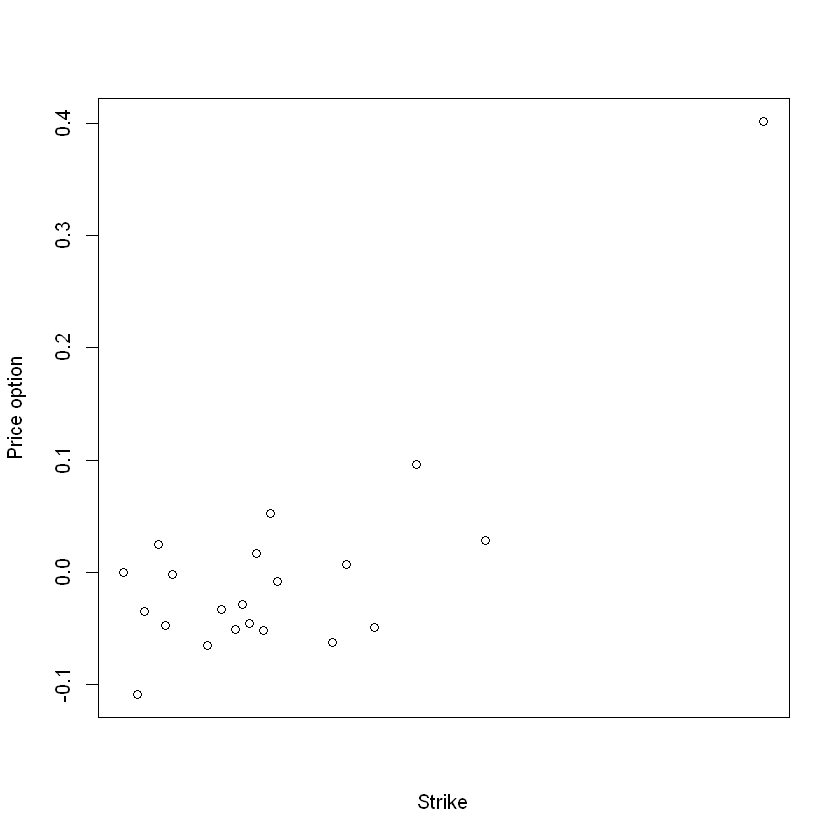

In [24]:
myplot = plot(df.var$strike,df.var$V10,xaxt='n',xlab = "Strike", ylab = "Price option")
axis(1, seq(at = 800,10000, by = 10), las=2)


In [17]:
max(df.var$strike)

[1] 10000

In [ ]:
#displaying the variation of the option price

In [39]:
#for(name in names(df)){
#    if(name!="V1"){
#        plot(df.var$V1,df[,name],xaxt='n' )
#        axis(1, at = seq(min(df.var$strike), max(df.var$strike), by = 10), las=2)
#    }
#}

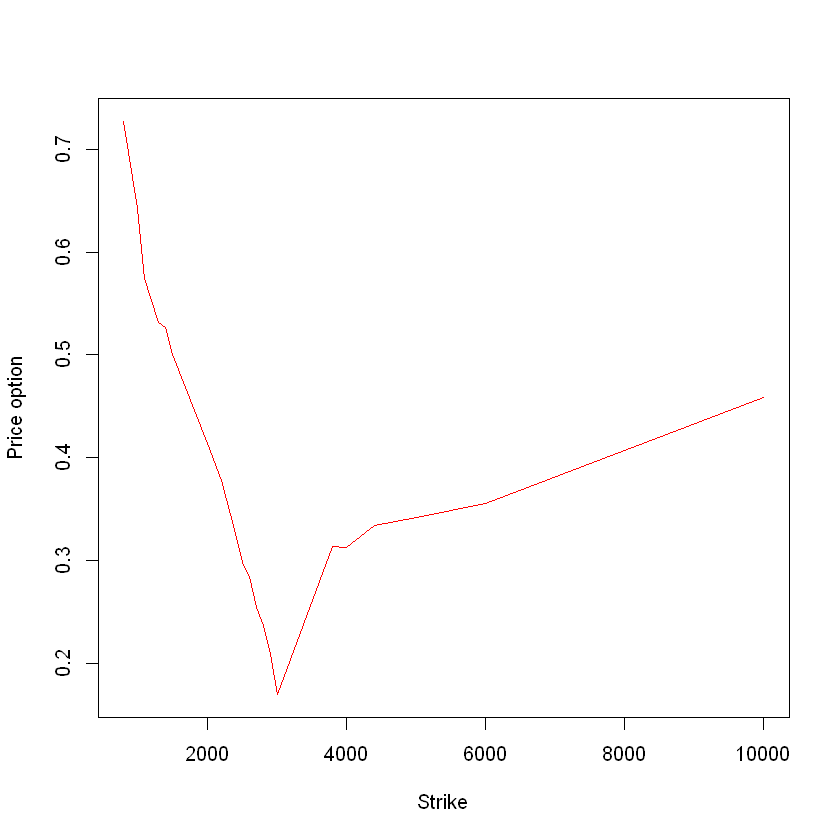

In [40]:

plot(df$V2 ~ df$V1,xlab = "Strike",ylab = "Price option",col="red", type="l")